# import library

In [2]:
import numpy as np
import cv2
#%matplotlib notebook
from matplotlib import pyplot as plt
print(cv2.__version__)

4.9.0


# 影像二值化前處理

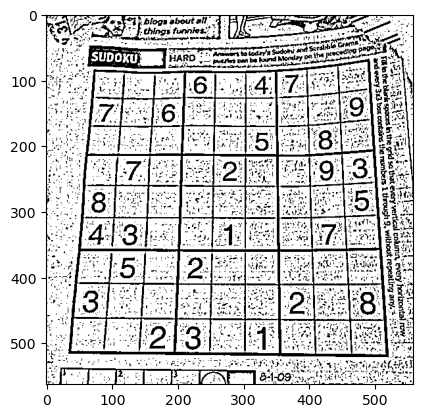

In [3]:
img = cv2.imread('data/sudoku.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
maxval = 255
blockSize = 11
Constant = 2
ori = cv2.adaptiveThreshold(gray,maxval,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,blockSize,Constant) #換行符號 \
plt.imshow(ori,'gray')
plt.show()

# 影像濾波
> 用於去除影像中的`雜訊`和不必要的細節，同時保留或強化感興趣的特徵

## 雜訊種類
```
抑制影像的雜訊是進行影像前處理的常備工作，因為當影像在傳輸的過程中，可能會受到外在因素的干擾，使得影像出現雜訊導致失真。
出現雜訊的影像若未經過前處理，直接對其進行影像處理如邊緣偵測時或是影像分割等處理，可能就會出現誤判的情況。
噪聲可能源於各種原因，如攝影設備、傳輸過程或環境條件。
```
以下是常見的影像噪聲種類
* 高斯噪聲 Gaussian Noise

> 高正態分佈的隨機噪聲，特徵是數據值集中在平均值附近，並且隨著偏離平均值的距離增加而逐漸減少。通常由感測器電子波動或傳輸過程引起。

* 鹽和胡椒噪聲 Impulse( Salt-and-Pepper) Noise

> 椒鹽噪聲也稱為脈衝雜訊，是圖像中經常見到的一種雜訊，它是一種隨機出現的白點或者黑點，可能是亮的區域有黑色像素或是在暗的區域有白色像素（或是兩者皆有）。椒鹽噪聲的成因可能是影像訊號受到突如其來的強烈干擾而產生、模數轉換器或位元傳輸錯誤等。例如失效的感應器導致像素值為最小值，飽和的感應器導致像素值為最大值。

*　均值噪聲
> 均勻分佈的噪聲，特徵是所有數據點的值具有相似的概率。這通常源於數據量化過程中的不確定性。

# Mean filter (平均濾波器)

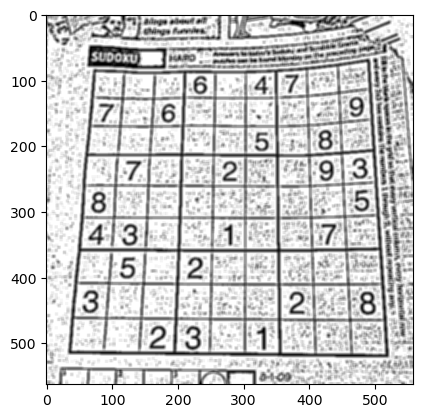

In [4]:
blurMean = cv2.blur(ori,(5,5))
plt.imshow(blurMean,'gray')
plt.show()

# Gaussian filter (高斯濾波器)

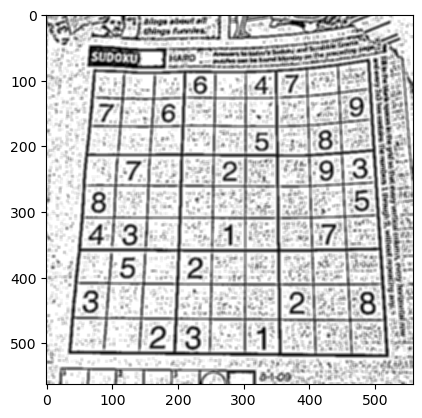

In [5]:
blurGauss = cv2.GaussianBlur(ori,(5,5),5)
plt.imshow(blurGauss,'gray')
plt.show()

# Median filter (中值濾波器)

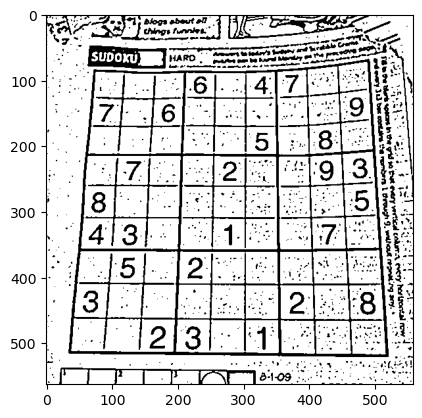

In [6]:
blurMedian = cv2.medianBlur(ori,3)
plt.imshow(blurMedian,'gray')
plt.show()

# Bilateral filter (雙邊濾波器)

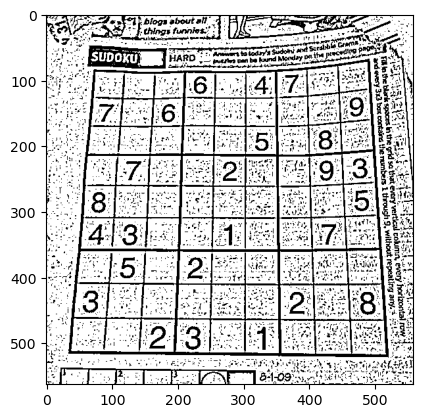

In [7]:
blurBilateral = cv2.bilateralFilter(ori,9,75,75)
plt.imshow(blurBilateral,'gray')
plt.show()

# Difference kernel size

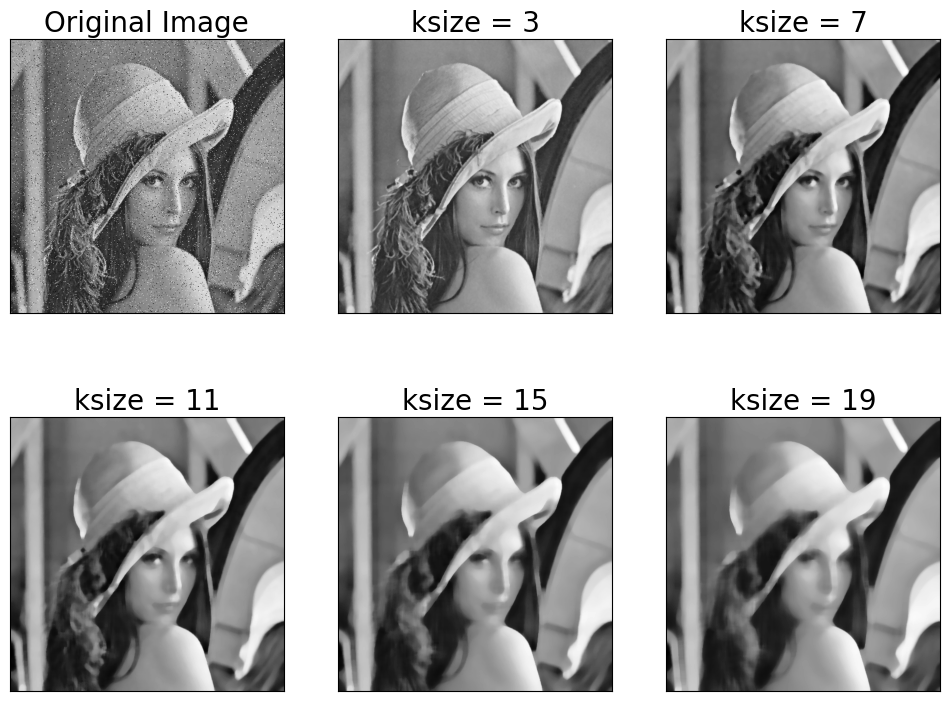

In [9]:
gray = cv2.imread("data/lena_salt_pepper.png", cv2.IMREAD_GRAYSCALE)
ksize = 3
blurMean1 = cv2.medianBlur(gray,ksize)
ksize = 7
blurMean2 = cv2.medianBlur(gray,ksize)
ksize = 11
blurMean3 = cv2.medianBlur(gray,ksize)
ksize = 15
blurMean4 = cv2.medianBlur(gray,ksize)
ksize = 19
blurMean5 = cv2.medianBlur(gray,ksize)
titles = ['Original Image','ksize = 3','ksize = 7','ksize = 11','ksize = 15','ksize = 19']
images = [gray, blurMean1, blurMean2, blurMean3, blurMean4, blurMean5]
plt.figure(num=None, figsize=(12, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i],fontsize=20)
    plt.xticks([]),plt.yticks([])

生理特徵或影像設備的操作方式有關。

## 總結
#### 高斯濾波：用高斯模糊來平滑圖像，減少高斯噪聲。#### 
中值濾波：適合消除鹽和胡椒噪聲，通常會在每個通道上獨立應用。#### 
雙邊濾波：可以在保持邊緣的情況下進行平滑處理，適合彩色影像。

# 練習
# 利用學到的濾波器過濾鹹蛋超人影像的椒鹽噪聲 (data/Egg.PNG)


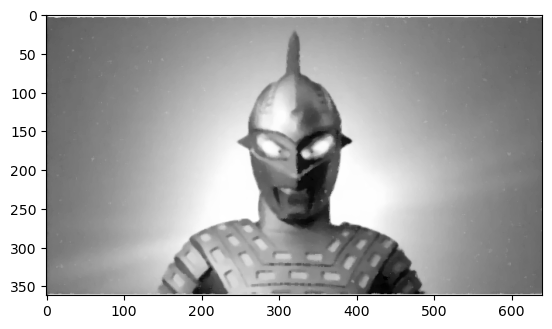

In [10]:
import numpy as np
import cv2
#%matplotlib notebook
from matplotlib import pyplot as plt

img = cv2.imread('data/Egg.PNG', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurMedian = cv2.medianBlur(gray,5)
plt.imshow(blurMedian,'gray')
plt.show()


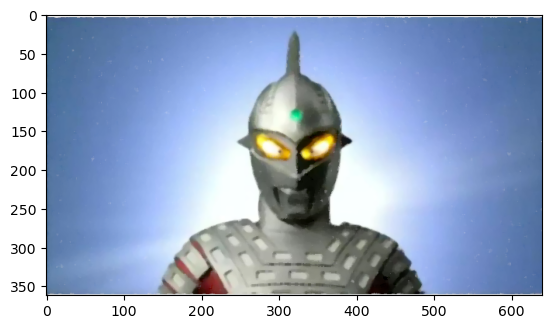

In [11]:
img = cv2.imread('data/Egg.PNG', cv2.IMREAD_COLOR)

blurMedian = cv2.medianBlur(img,5)
blurMedian = cv2.cvtColor(blurMedian, cv2.COLOR_BGR2RGB)

plt.imshow(blurMedian,'gray')
plt.show()